In [489]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [490]:
ex3data1 = scipy.io.loadmat("./ex3data1.mat")
X = ex3data1['X']
y = ex3data1['y'][:,0]
y[y==10] = 0
m, n = X.shape
m, n

(5000, 400)

In [491]:
## Setup the parameters you will use for this exercise
input_layer_size  = n    # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

In [492]:
ex3weights = scipy.io.loadmat('./ex3weights.mat')
Theta1 = ex3weights['Theta1']
Theta2 = ex3weights['Theta2']
Theta1.shape, Theta2.shape

((25, 401), (10, 26))

In [493]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def lrCostFunction(theta, X, y, Lam):
    m = len(y)
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost = cost + Lam/(2*m) * sum(theta[1:]**2)
    
    # compute gradient
    j_0 = 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lam/m)* theta[1:]
    grad = np.vstack((j_0, j_1))
    return regCost[0], grad

def cost(theta, X, y, lam):
    m = len(y)
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost = cost + lam/(2*m) * sum(theta[1:]**2)
    
    return regCost[0]

def gradient(theta, X, y, lam):
    m = len(y)
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    predictions = sigmoid(X @ theta)
    
    theta0 = 1/m * (X.transpose() @ (predictions - y))[0]
    theta1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (lam/m)* theta[1:]
    
    grad = np.vstack((theta0, theta1))
   
    return np.array(grad).ravel()

In [494]:
import matplotlib.image as mpimg

def displayData(X):
    fig, axis = plt.subplots(10,10,figsize=(8,8))
    for i in range(10):
        for j in range(10):
            axis[i,j].imshow(X[i*10+j,:].reshape(20,20,order="F"), cmap="hot")
            axis[i,j].axis("off")

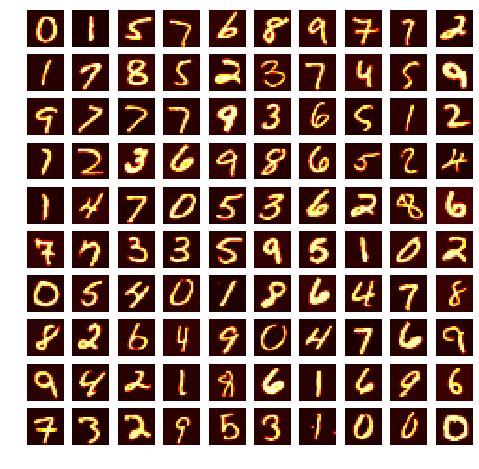

In [495]:
# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100],:]

displayData(sel)

In [496]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t = np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
#J, grad = lrCostFunction(theta_t, X_t, y_t, 3)
J = cost(theta_t, X_t, y_t, 3)
grad = gradient(theta_t, X_t, y_t, 3)

print("Cost:",J,"Expected cost: 2.534819\n")
print("Gradients:\n",grad,"\n\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.534819396109744 Expected cost: 2.534819

Gradients:
 [ 0.14656137 -0.54855841  0.72472227  1.39800296] 

Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [527]:
def gradientDescent(X, y, theta, alpha, numIters, lam):
    m = len(y)
    J_history = []
    
    for i in range(numIters):
        cost, grad = lrCostFunction(theta, X, y, lam)
        theta = theta - (alpha * grad)
        J_history.append(cost)
        print("cost = ", cost, "\n")
    
    return theta, J_history

def oneVsAll(X, y, numLabels, lam):
    m, n = X.shape[0], X.shape[1]
    theta = np.zeros([n+1, 1])
    allJ = []
    
    X = np.hstack((np.ones((m,1)), X))
    
    for i in range(1, numLabels + 1):
        print('Training theta for label ', i)
        #theta, J_history = gradientDescent(X, np.where(y==i,1,0), theta, 1, 1, lam)
        
        cost, grad = lrCostFunction(theta, X, np.where(y==i,1,0), 1)
        theta = theta - (0.1 * grad)
        
        print('cost ', cost)
        
        allJ.append(cost)

    return cost, allJ

In [525]:
theta, allJ = oneVsAll(X, y, 10, 1)

Training theta for label  1
cost  0.6931471805599918
Training theta for label  2
cost  0.33336882225030706
Training theta for label  3
cost  0.2200752081065557
Training theta for label  4
cost  0.16614046866329057
Training theta for label  5
cost  0.13434968744881526
Training theta for label  6
cost  0.11325909666529631
Training theta for label  7
cost  0.09818155127938562
Training theta for label  8
cost  0.08683277649163146
Training theta for label  9
cost  0.07796240964635678
Training theta for label  10
cost  0.07082659956272445


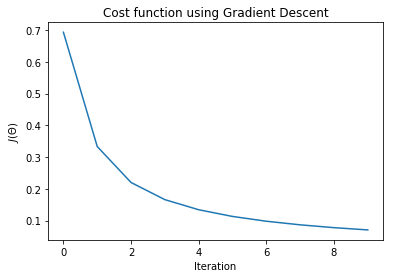

In [529]:
plt.plot(allJ[0:10])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()